In [1]:
import copy
import json
import glob
import os
import random

import matplotlib.pyplot as plt
import nltk as nltk
import numpy as np
from collections import Counter
import math
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from random import shuffle
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn import svm
from sklearn import metrics

from catboost import CatBoostRegressor, Pool


In [2]:
train = pd.read_csv('train.csv', index_col=0).sample(frac=1)
y_train = train['correct']
X_train = train[['name']]

test = pd.read_csv('test.csv', index_col=0).sample(frac=1)
y_test = test['correct']
X_test = test[['name']]


In [3]:
with open(os.path.join(os.getcwd(), 'FirstCharToNameList.txt'), 'r') as f:
    firstCharToNameList = json.load(f)

len(firstCharToNameList)

25

In [4]:
nameToProbability = {}
for ch in firstCharToNameList:
    names = firstCharToNameList[ch]
    N = len(names)
    for i, name in enumerate(names):
        nameToProbability[name] = (1.0 - i * 1.0 / N) ** 2


In [5]:
y_test_pred = [nameToProbability[name] for name in X_test['name']]

In [6]:
#y_test_pred[:50]
len(y_test_pred)

72792

In [7]:
df_proba = pd.DataFrame(data=y_test_pred, columns=['proba'])
df_metric = pd.concat([df_proba, y_test.to_frame(), test[['group']]], axis=1)
df_metric = df_metric.sort_values(by=['group', 'proba', 'correct'], ascending=[True, False, True])
print(df_metric)

          proba  correct  group
1      1.000000        0     24
7      1.000000        0     24
4      0.995311        0     24
6      0.986928        0     24
5      0.589218        0     24
...         ...      ...    ...
72787  0.993186        0  42897
72791  0.943475        0  42897
72784  0.939510        1  42897
72786  0.825283        0  42897
72785  0.358312        0  42897

[72792 rows x 3 columns]


In [8]:
positions = []
cur_group = -1
cur_pos = 1
for row in df_metric.itertuples():
    cur_pos += 1
    if row.group != cur_group:
        cur_pos = 1
        cur_group = row.group
    if row.correct == 1:
        positions.append(cur_pos)

In [9]:
print(f'min = {np.min(positions)}')
print(f'max = {np.max(positions)}')
print(f'mean = {np.mean(positions)}')

min = 1
max = 8
mean = 4.6321573799318605


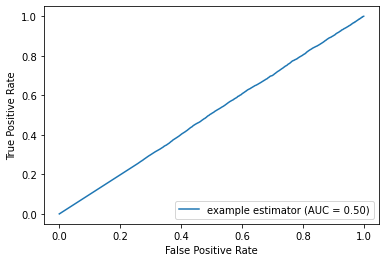

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(df_metric['correct'].tolist(), df_metric['proba'].tolist())
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

In [11]:
count = [0] * 9
for p in positions:
    count[p] += 1

acc = 0
sum_all = sum(count)
for i, c in enumerate(count):
    acc += c
    print(f'top{i} = {acc / sum_all}')

top0 = 0.0
top1 = 0.0624244422464007
top2 = 0.20057149137267832
top3 = 0.35421474887350257
top4 = 0.49499945048906474
top5 = 0.6236949115287395
top6 = 0.7518408616331465
top7 = 0.8800967139246071
top8 = 1.0


In [12]:
y_train_pred = [nameToProbability[name] for name in X_train['name']]
df_proba = pd.DataFrame(data=y_train_pred, columns=['proba'])
df_metric = pd.concat([df_proba, y_train.to_frame(), train[['group']]], axis=1)
df_metric = df_metric.sort_values(by=['group', 'proba', 'correct'], ascending=[True, False, True])
print(df_metric)

           proba  correct  group
1       1.000000        0      0
4       0.990632        0      0
3       0.948229        0      0
2       0.916571        0      0
5       0.781384        0      0
...          ...      ...    ...
270933  0.983806        0  42965
270934  0.922859        0  42965
270932  0.775335        0  42965
270928  0.353470        1  42965
270930  0.292303        0  42965

[270936 rows x 3 columns]


In [13]:
positions = []
cur_group = -1
cur_pos = 1
for row in df_metric.itertuples():
    cur_pos += 1
    if row.group != cur_group:
        cur_pos = 1
        cur_group = row.group
    if row.correct == 1:
        positions.append(cur_pos)

In [14]:
print(f'min = {np.min(positions)}')
print(f'max = {np.max(positions)}')
print(f'mean = {np.mean(positions)}')

min = 1
max = 8
mean = 4.639235834292969


In [15]:
count = [0] * 9
for p in positions:
    count[p] += 1

acc = 0
sum_all = sum(count)
for i, c in enumerate(count):
    acc += c
    print(f'top{i} = {acc / sum_all}')

top0 = 0.0
top1 = 0.06572769953051644
top2 = 0.2027046977884076
top3 = 0.3557740573419553
top4 = 0.495467564295627
top5 = 0.6226415094339622
top6 = 0.746951309534355
top7 = 0.8714973277822069
top8 = 1.0
